# TP 1 - Créer son propre générateur de nombre aléatoire
Lors de ce TP vous allez implémenter les 3 PRNG (Pseudo Random Number Generator) suivants:
- LCG (Linear Congruencial Generator)
- Mersenne Twister
- Blum Blum Shub

Le test de ces différents PRNG se fera dans le TP 2

Pour se faire, vous allez devoir implémenter le code manquant signaler par le commentaire "# votre code"

## LCG
On commence par le PRNG le plus simple : LCG
Comme vu dans le cours, ce générateur est très simple à implémenter. La difficulté réside dans le choix des paramètres a,c et m qui doit être judicieusement choisi afin de respecter certaine propriété mathématique. Sinon on risque d'avoir une série pas vraiment aléatoire.

**Équation du Générateur Congruentiel Linéaire (LCG) :**
$X_{n+1} = (a \cdot X_n + c) \mod m$

On va utiliser les valeurs du générateur de Knuth & Lewis:
$a = 1664525$, $c = 1013904223$, $m = 2^{32}$

On doit pouvoir retourner soit un nombre compris entre 0 et 1, soit un bit (0 ou 1)


In [4]:
class LinearCongruentialGenerator:
    def __init__(self, is_bit=False, seed=1, a=1664525, c=1013904223, m=2**32):
        self.is_bit = is_bit
        self.state = int(seed)
        self.a = a
        self.c = c
        self.m = m

    def next(self):
        # votre code
        self.state = ...
        if self.is_bit:
            # retourne le bit le plus faible dans un premier temps
            return ...
        else:
            # retourne une valeur comprise entre 0 et 1
            return ...

In [2]:
# Exécuter cette cellule afin de vérifier que l'implémentation est correct
LCG = LinearCongruentialGenerator(seed=123, is_bit=False)


generated_number = []

for _ in range(10):
    generated_number.append(LCG.next())

generated_number_test = [0.283736921447268, 0.43513002373164755, 0.03865125776237139, 0.22087990474442018, 0.3594270763824291, 0.5902441389836008, 0.36128090051032624, 0.32684990841123507, 0.07973951242858067, 0.6479622529931278]
assert generated_number_test == generated_number
print("Test successful !!!")

Test successful !!!


In [3]:
#Initialiser le générateur afin de générer quelques bits
# votre code
LCG_bits = ...
# -----------
generated_bits = []
for _ in range(10):
    generated_bits.append(LCG_bits.next())
print(generated_bits)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]


### Questions
**Que remarque t'on sur le série de bits générée ?**
...

**Que peut-on faire pour palier à ce problème ?**
...

**Corriger le code afin de prendre en compte cette amélioration et vérifier en exécutant le test ci-dessous**

In [9]:
generated_bits = []
LCG_bits = LinearCongruentialGenerator(seed=123, is_bit=True)
for _ in range(10):
    generated_bits.append(LCG_bits.next())
generated_bits_test = [0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
assert generated_bits_test == generated_bits
print("Test successful !!!")

Test successful !!!


### Représentation graphique
On souhaite maintenant afficher la distribution des nombres pseudo-aléatoires dans un plan 2D afin de vérifier visuellement que la distribution est bien uniforme.
Pour se faire, on va tracer des points de coordonnées x et y en suivant cette exemple : seq = [x1, x2, x3, x4] => c1 = (x1, x2), c2 = (x2, x3), c3 = (x3, x4)

In [65]:
import matplotlib.pyplot as plt
def plot_2D_distribution(list_of_numbers):
    lenght_seq = len(list_of_numbers)
    # votre code
    plt.scatter(...)
    #------------------
    plt.show()

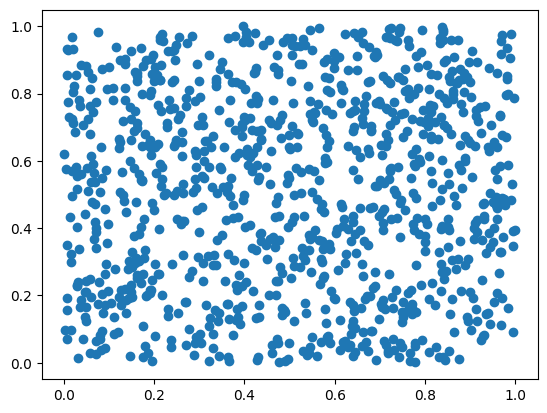

In [53]:
list_of_numbers = []
n = 1000
for _ in range(n):
    list_of_numbers.append(LCG.next())

plot_2D_distribution(list_of_numbers)

### Commenter
...

### Cas d'un mauvais paramètrage des valeurs a, c et m -> le LCG RANDU
Ce LCG est bien connu car il a été beaucoup utilisé alors qu'il avait de mauvaise propriété aléatoire. Une des particularités du LCG est qu'on voit apparaitre des plans à partir d'une certaine dimension. La qualité d'un LCG dépend de la distance entre les plans et la dimension à partir de laquelle elles apparaissent. Pour RANDU, des plans apparaissent dès la 3eme dimension ce qui en fait un mauvais PRNG.
Les paramètres sont : a = 65539, c = 0 et m = 2^31

In [54]:
# Initialiser le générateur avec les paramètres du RANDU
# votre code
LCG_RANDU = ...

In [82]:
def plot_3D_distribution(list_of_numbers):
    lenght_seq = len(list_of_numbers)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # votre code
    # A partir du même principe que la fonction plot_2D_distribution, implémenter la version en 3D qui prendra 3 input
    ax.scatter(...)
    #----------
    ax.view_init(elev=50, azim=65)
    plt.show()

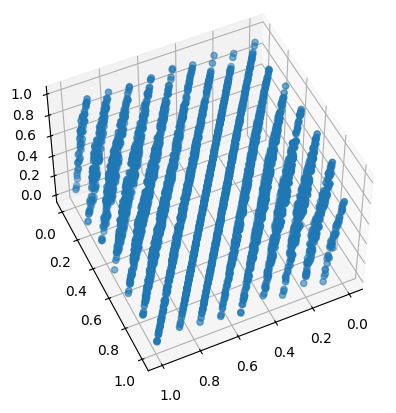

In [88]:
list_of_numbers_RANDU = []
n = 5000
for _ in range(n):
    list_of_numbers_RANDU.append(LCG_RANDU.next())

plot_3D_distribution(list_of_numbers_RANDU)

## Blum Blum shub
On va maintenant implémenter le PRNG blum blum shub. Ce génèrateur est particulièrement adapter à des applications cryptographiques et moins pour de la simulation car il est plus lent. En effet le faite d'avoir un modulo en puissance de 2 n'est pas un hasard, il permet d'éviter l'opération modulo qui est couteuse en appliquant des opérations directement sur les bits. Avec blum blum shub, le modulo **m** n'est pas une puissance de 2 mais le produit de nombre premier **p** et **q**. C'est la difficulté à factoriser le produit de deux grands nombres premiers qui en fait un PRNG sûr pour la cryptographie.
L'équation est donnée par :
$X_{n+i} = (X_{i})^2 \mod m$
avec $m = p \cdot q$
On va utiliser les valeurs suivantes qui respectent les conditions pour avoir une grande période
p = 30000000091
q = 40000000003

In [89]:
class BlumBlumShub:
    def __init__(self, is_bit=False, p=30000000091, q=40000000003, seed=1):
        self.is_bit = is_bit
        self.state = int(seed) % n
        self.m = p * q

    def next(self):
        # votre code
        self.state = ...
        if self.is_bit:
            # retourne le bit le plus faible
            return ...
        else:
            # retourne un float entre 0 et 1
            return ...

In [91]:
# Exécuter cette cellule afin de vérifier que l'implémentation est correct
BBS = BlumBlumShub(seed=123, is_bit=False)
BBS_bits = BlumBlumShub(seed=123, is_bit=True)

generated_number = []
generated_bits = []
for _ in range(10):
    generated_number.append(BBS.next())
    generated_bits.append(BBS_bits.next())

generated_number_test = [1.2607499960811688e-17, 1.9073886690712003e-13, 4.365757855451676e-05, 0.8830762294157947, 0.7926607416512401, 0.1422970501174527, 0.7171099042680498, 0.932592260431516, 0.2264022078946638, 0.4700187467108153]
generated_bits_test = [1, 1, 1, 0, 1, 0, 0, 1, 0, 0]
assert generated_number_test == generated_number
assert generated_bits_test == generated_bits
print("Test successful !!!")

[1.2607499960811688e-17, 1.9073886690712003e-13, 4.365757855451676e-05, 0.8830762294157947, 0.7926607416512401, 0.1422970501174527, 0.7171099042680498, 0.932592260431516, 0.2264022078946638, 0.4700187467108153]
[1, 1, 1, 0, 1, 0, 0, 1, 0, 0]
Test successful !!!


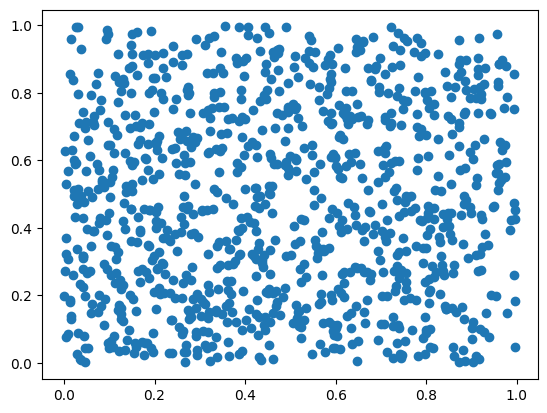

In [92]:
# afficher la distribution 2D
list_of_numbers_BBS = []
n = 1000
for _ in range(n):
    list_of_numbers_BBS.append(BBS.next())
plot_2D_distribution(list_of_numbers_BBS)

## Mersenne Twister
Le générateur de Mersenne Twister est de meilleur qualité que le LCG que l'on a vu précédent pour plusieurs raisons :
- Il possède une très grande période de $2^{19937} - 1$
- il est aléatoire quel que soit le poids du bit considéré contrairement au LCG
- Il est plus rapide que la plupart des autres générateurs

**Ce générateur est basé sur le fonctionnement suivant:**
- Initialisation des 624 états (int 32) **Attention**, ces nombres initialisés ne doivent pas être utilisé car de mauvaise qualité
- Calcul des 624 états suivants qui viennent les remplacer à l'aide de la fonction twist
- Chacun des 624 états sera un nombre aléatoire en sorti après transformation utilisant des opération sur les bits
- A partir du 625ème nombre aléatoire, il faut à nouveau utiliser la fonction twist pour en générer 624 nouveaux

Ca grande période provient du fait qu'on stocke un état interne qui permet de générer les nombres aléatoire suivant au lieu de ne considérer uniquement le nombre précedent. la période est donnée par $2^{624 \cdot 32 - 31} - 1 = 2^{19937} - 1$ avec 624 la taille de l'état interne, 32 car on génère des entier de 32 bits (il existe une version en 64 bits) auquel on soustrait 31 qui est le nombre de bit du lower mask.

**L'équation pour l'initialisation de l'état initial est donnée par :**

$x_i = f \times (x_{i-1} \oplus (x_{i-1} \gg (w-2))) + i$

Avec $f = 1812433253$, $w = 32$ (le nombre de bit d'un entier).
$\oplus$ est l'opérateur XOR effectué sur des bits, en python il s'écrit '^'
$\gg$ décale les bits vers la droite ex: $10101 \gg 3 = 10$

**L'enchainement d'opération qui permet de transformer un entier de l'état interne en nombre aléatoire est:**

$
y \equiv x \oplus ((x \gg u) \ \& \ d) \\
y \equiv y \oplus ((y \ll s) \ \& \ b) \\
y \equiv y \oplus ((y \ll t) \ \& \ c) \\
z \equiv y \oplus (y \gg l)
$

Avec $u = 11$, $d = FFFFFFFF$ qui est la représentation en hexadecimal de $2^{32}$. $\&$ est l'opération 'et' sur les bits (appliquer l'opération $\&$ avec $2^{32}$ sur un entier 32 bits ne modifie pas sa valeur)
$s = 7, b = 9D2C5680$, $t = 15, c = EFC60000$, $l = 18$

**La fonction twist est définir par l'équation suivante :**
$x_{k+n} := x_{k+m} \oplus \left((x_{k}^{u} \mid x_{k+1}^{l})A\right)$
Et
$\boldsymbol{x}A = \begin{cases} \boldsymbol{x} \gg 1 & \ \text{si } x_{0} = 0 \\ (\boldsymbol{x} \gg 1) \oplus \boldsymbol{a} & \ \text{si } x_{0} = 1 \end{cases}$

Avec $x_{0}$ le bit le plus faible, $a = 9908b0df$, $\mid$ représente l'opération concaténation des bits, $x_{k}^{u}$ représente les $32 - r$ upper bits de $x_{k}$ et $x_{k+1}^{l}$ représente les $r$ lower bits de $x_{k+1}$ avec $r = 31$.
 Afin d'appliquer l'opération concaténation on va récupérer le bits de poids fort $x_{k}^{u}$ et compléter les 31 bits restant avec des zéros (appliquer un mask $1 \ll 31$ avec l'opérateur $\&$).
 On récupère les 31 premiers bits de $x_{k+1}^{l}$ (appliquer un mask $(1 \ll 31) - 1$ avec l'opérateur $\&$).
 Finalement additioner les 2 résultats ensemble.

On rappelle qu'un entier du vecteur d'état est défini sur 32 bits, on doit appliquer le modulo pour ne pas dépasser la valeur de $2^{32}$. La fonction **int_32** a déjà été implémenter à cette effet.



In [60]:
class MersenneTwister():
    def __init__(self, is_bit=False, seed=5489):
        self.is_bit = is_bit
        self.state = [0]*624
        self.f = 1812433253
        self.m = 397
        self.u = 11
        self.s = 7
        self.b = 0x9D2C5680
        self.t = 15
        self.c = 0xEFC60000
        self.l = 18
        self.index = 624 # le vecteurs d'état étant initialisé ci-dessous, on positionne l'index à 624 afin de ne pas utiliser les valeurs générées avant le premier twist
        self.lower_mask = (1<<31)-1 # mask qui permet de récupérer les 31 bits les plus faibles
        self.upper_mask = 1<<31 # mask qui permet de récupérer le bit de poids fort en remplissant de 0 jusqu'à 32 bits

        # Initialisation des 624 états
        self.state[0] = int(seed)
        for i in range(1,624):
            # votre code
            # penser à appliquer le modulo pour ne pas dépasser 32 bits
            self.state[i] = ...

    def twist(self):
        # effectuer un twist qui renouvelle le vecteur d'état une fois l'index 624 atteint
        for i in range(624):
            # votre code
            ...
            self.state[i] = ...
            #------------
        self.index = 0

    def next(self):
        # effectuer un twist dès qu'on atteint 624
        if self.index >= 624:
            self.twist()
        y = self.state[self.index]
        # votre code
        y = ...
        #-------------
        self.index+=1
        # penser à appliquer le modulo
        if self.is_bit:
            # retourne le bit de poids faible
            # votre code
            return ...
        else:
            # retourne une valeur entre 0 et 1
            # votre code
            return ...

    def int_32(self, number):
        return int(0xFFFFFFFF & number)

In [63]:
# Exécuter cette cellule afin de vérifier que l'implémentation est correct
MT = MersenneTwister(seed=123, is_bit=False)
MT_bits = MersenneTwister(seed=123, is_bit=True)

generated_number = []
generated_bits = []
for _ in range(10):
    generated_number.append(MT.next())
    generated_bits.append(MT_bits.next())

generated_number_test = [0.6964691874330093, 0.7129553215841193, 0.2861393388095636, 0.4284709250620731, 0.2268514549887859, 0.6908848515457672, 0.5513147652501508, 0.7191503089198727, 0.7194689707177386, 0.49111893272286256]
generated_bits_test = [0, 1, 0, 0, 0, 0, 0, 1, 1, 0]
assert generated_number_test == generated_number
assert generated_bits_test == generated_bits
print("Test successful !!!")

Test successful !!!


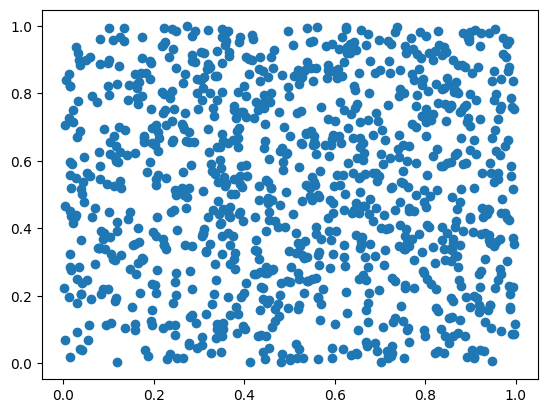

In [66]:
# afficher la distribution 2D
list_of_numbers_MT = []
n = 1000
for _ in range(n):
    list_of_numbers_MT.append(MT.next())
plot_2D_distribution(list_of_numbers_MT)
